In [2]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D, proj3d
from matplotlib.patches import FancyArrowPatch




In [3]:
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

In [4]:
(10,0,0)

ans = []
xlist = []
ylist = []
zlist = []
clist = []

for i in range(100):
    x = random.uniform(-2, 2)
    y = random.uniform(-2, 2)
    z = random.uniform(-2, 2)
    r = math.sqrt((x - 10)**2 + y**2 + z**2) 
    
    

    if (x**2 + y**2 + z**2 <= 4):
        ans.append(r)
        xlist.append(x)
        ylist.append(y)
        zlist.append(z)
        c = 1/r**2 * np.array([10 - x, y, z])
        clist.append(c)
    
    else:
        pass

In [5]:
force_net = sum(clist)
force_net /= np.sqrt(sum(list(map(lambda x:x**2, force_net))))
force_net *= 10
force_net

array([ 9.99995648e+00,  2.94307424e-02, -2.07907634e-03])

<function matplotlib.pyplot.show(*args, **kw)>

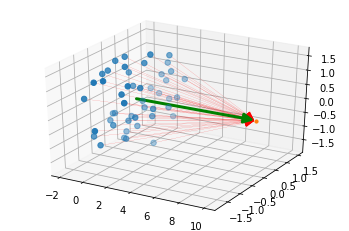

In [6]:
fig = plt.figure()
ax = fig.gca(projection='3d')

#ax.plot(xlist,ylist,zlist, '.')
cord = zip(xlist, ylist, zlist)

ax.scatter(xs=xlist, ys=ylist, zs=zlist, s=30)
ax.scatter(xs=10, ys=0, zs=0, s=10)
for x, y, z, c in zip(xlist, ylist, zlist, clist):
    a = Arrow3D([x, 10], [y, 0], [z, 0], mutation_scale=20, lw=0.1, arrowstyle="-|>", color="r")
    ax.add_artist(a)

a = Arrow3D([0, force_net[0]], [0, force_net[1]], [0, force_net[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="g")
ax.add_artist(a)
plt.show

In [7]:
r0 = math.sqrt((0 - 10)**2 + 0**2 + 0**2)
print(r0)

10.0


In [9]:
acc = math.sqrt((10 - force_net[0])**2 + force_net[1] ** 2 + force_net[2]**2)
print(acc)

0.0295041191777377
